<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string
from bs4 import BeautifulSoup as bs

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import squarify
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_lg")

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
##### Your Code Here #####
jobs = pd.read_csv("data\job_listings.csv", index_col=0)

In [3]:
jobs.shape

(426, 2)

In [4]:
jobs.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [5]:
##### Your Code Here #####

nlp.Defaults.stop_words |= {"___________________________________________________________________________________",
                            "li", "and", "to", "you", "or", "for", "div", "tr", "in", "xe", "be", "in", 
                            "with", "ul", "of", "that",}

print('stripping html tags...')
jobs['description_clean'] = jobs.description.apply(lambda x: bs(x).get_text().replace("\\n", " "))
print('stripping numbers...')
jobs['description_clean'] = jobs.description_clean.apply(lambda x: re.sub('[0-9]+', '', x))
print('tokenizing...')
jobs['tokenized'] = jobs.description_clean.apply(lambda x: [token.text for token in nlp(x) if not token.is_stop])

stripping html tags...
stripping numbers...
tokenizing...


In [6]:
jobs.head()

,description,title,description_clean,tokenized
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements: Conceptual understanding i...","[b""Job, Requirements, :, Conceptual, understan..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description As a Data Scientist , you w...","[b'Job, Description, , Data, Scientist, ,, he..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, Data, Scientist, working, consulting, b..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$, - $, a monthContractUnder the general sup...","[b'$, ,, -, $, ,, monthContractUnder, general,..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe\x\x multiple locations + y...,"[b'Location, :, USA, \xe\x\x, multiple, locati..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [8]:
##### Your Code Here #####
count_vect = CountVectorizer()

dtm = count_vect.fit_transform(jobs.description_clean.values)
dtm_df = pd.DataFrame(dtm.todense(),columns=count_vect.get_feature_names())

## 4) Visualize the most common word counts

In [9]:
word_ranks = dtm_df.sum().sort_values(ascending=False)

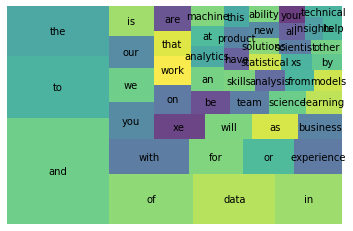

In [10]:
squarify.plot(sizes=word_ranks.values[:50], label=word_ranks.index[:50], alpha=0.8)
plt.axis('off')
plt.show();


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [16]:
##### Your Code Here #####
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

dtm_tfidf = tfidf.fit_transform(jobs.description_clean.values)
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.todense(),columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm_tfidf_df.head()

,___________________________________________________________________________________,aa,aap,ab,abernathy,abilities,ability,able,abounds,abroad,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.091940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.020716,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.067356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.109963,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [21]:
##### Your Code Here #####
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_tfidf_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [19]:
dtm_tfidf_df.iloc[0]

___________________________________________________________________________________    0.0
aa                                                                                     0.0
aap                                                                                    0.0
ab                                                                                     0.0
abernathy                                                                              0.0
                                                                                      ... 
zogsports                                                                              0.0
zones                                                                                  0.0
zoom                                                                                   0.0
zuckerberg                                                                             0.0
zurich                                                                                 0.0

In [22]:
# Query Using kneighbors 
nn.kneighbors([dtm_tfidf_df.iloc[0]])

(array([[0.        , 1.28522843, 1.31188987, 1.31980148, 1.32089146]]),
 array([[  0, 276, 274, 338, 366]], dtype=int64))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 